In [1]:

import pandas as pd
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('GlobalLandTemperaturesByMajorCity.csv')
df.head()


,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


Działa

In [2]:
df.shape
df.info()
df.describe(include='all')
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239177 entries, 0 to 239176
Data columns (total 7 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             239177 non-null  object 
 1   AverageTemperature             228175 non-null  float64
 2   AverageTemperatureUncertainty  228175 non-null  float64
 3   City                           239177 non-null  object 
 4   Country                        239177 non-null  object 
 5   Latitude                       239177 non-null  object 
 6   Longitude                      239177 non-null  object 
dtypes: float64(2), object(5)
memory usage: 12.8+ MB


dt                                   0
AverageTemperature               11002
AverageTemperatureUncertainty    11002
City                                 0
Country                              0
Latitude                             0
Longitude                            0
dtype: int64

Rozkład - szkielet

In [ ]:
import matplotlib.pyplot as plt

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

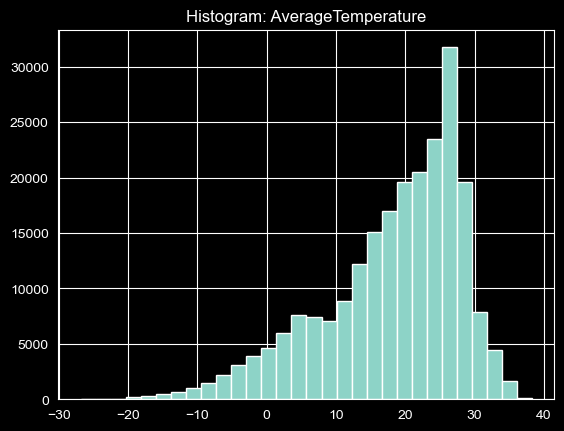

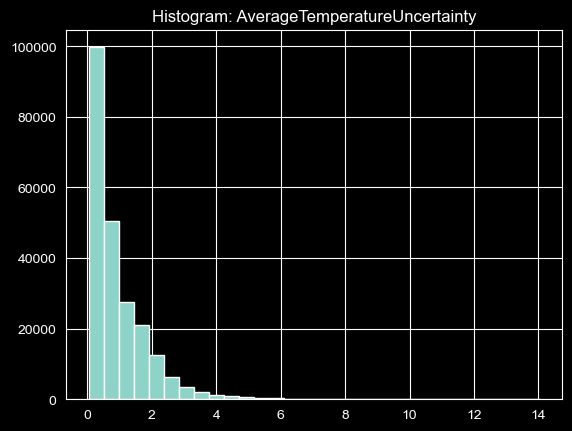

In [4]:
 for col in numeric_cols:
    plt.figure()
    df[col].hist(bins=30)
    plt.title(f'Histogram: {col}')
    plt.show()

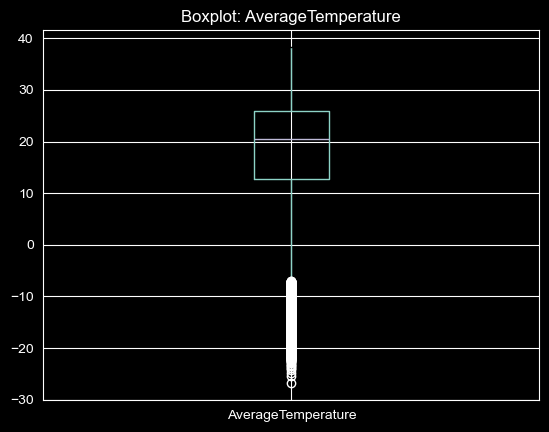

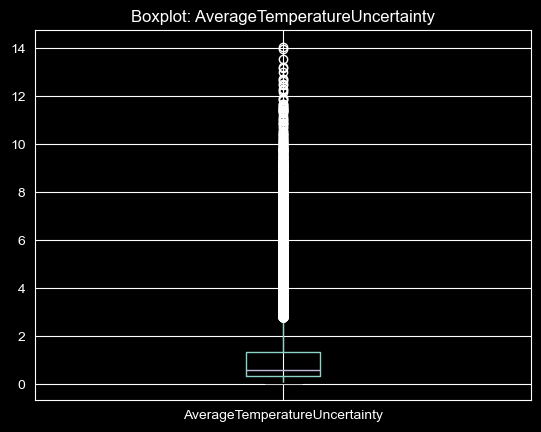

In [5]:
for col in numeric_cols:
    plt.figure()
    df.boxplot(column=col)
    plt.title(f'Boxplot: {col}')
    plt.show()

Korelacje

In [6]:
corr = df.corr(numeric_only=True)
corr

,AverageTemperature,AverageTemperatureUncertainty
AverageTemperature,1.00000,-0.19938
AverageTemperatureUncertainty,-0.19938,1.00000


Preprocessing

In [7]:
data = df.copy()
for col in numeric_cols:
    data[col] = data[col].fillna(data[col].median())
# uzupelnienie
cat_cols = data.select_dtypes(include=['object', 'category']).columns
for col in cat_cols:
    data[col] = data[col].fillna('brak_danych')


Kodowanie zmiennych kategorycznych

In [8]:
data_encoded = pd.get_dummies(data, drop_first=True)
data_encoded.head()

,AverageTemperature,AverageTemperatureUncertainty,dt_1743-12-01,dt_1744-01-01,dt_1744-02-01,dt_1744-03-01,dt_1744-04-01,dt_1744-05-01,dt_1744-06-01,dt_1744-07-01,...,Longitude_8.22E,Longitude_80.09E,Longitude_80.50W,Longitude_80.60E,Longitude_87.27W,Longitude_88.25E,Longitude_90.00E,Longitude_95.44E,Longitude_98.96W,Longitude_99.91E
0,26.704,1.435,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,27.434,1.362,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,28.101,1.612,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,26.140,1.387,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,25.427,1.200,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Skalowanie

In [9]:
X = data_encoded.drop('AverageTemperature', axis=1)
y = (data_encoded['AverageTemperatureUncertainty'] >
     data_encoded['AverageTemperatureUncertainty'].median()).astype(int)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Regresja

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)
y_pred = reg_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse, mae

(0.09148797769907759, 0.22862871540595261)

Klasyfikacja

In [11]:
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)
clf = LogisticRegression(max_iter=1000)

clf.fit(X_train_clf, y_train_clf)

y_pred_clf = clf.predict(X_test_clf)

acc = accuracy_score(y_test_clf, y_pred_clf)
cm = confusion_matrix(y_test_clf, y_pred_clf)
acc, cm

(0.9919098586838364,
 array([[24757,   153],
        [  234, 22692]]))